In [391]:

# Import Data yang diperlukan
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Baca CSV data dengan menghilangkan space di setiap col nya
MarketSurvey2019 = pd.read_csv('https://raw.githubusercontent.com/dhorihasan/dataset/main/MarketSurvey2019v1.csv',sep=';',skipinitialspace=True,index_col='IDRetailer')

#Sample Data paling atas
MarketSurvey2019.head()

,Category,StockProdRegular,ScoreLayananStock
IDRetailer,,,
1,Cat-O,8,7
2,Cat-O,5,8
3,Cat-O,6,7
4,Cat-O,51,9
5,Cat-O,5,8


In [392]:
# Melihat Jumlah Baris dan Kolom
MarketSurvey2019.shape

(2963, 3)

In [393]:
# Melihat Missing data dan type data
MarketSurvey2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2963 entries, 1 to 2963
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           2963 non-null   object
 1   StockProdRegular   2963 non-null   int64 
 2   ScoreLayananStock  2963 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 92.6+ KB


In [394]:
# Buat maping untuk Columns Category
# dimana ada Cat-A = 0, Cat-H = 1, Cat-O = 2

MarketSurvey2019['Category'] = MarketSurvey2019['Category'].map({'Cat-A':0,'Cat-H':1,'Cat-O':2})

# Menghapus value yang NAN serta merubah semua type data menjadi int
#MarketSurvey2019 = MarketSurvey2019.dropna()

# Melihat data teratas
MarketSurvey2019.head()

,Category,StockProdRegular,ScoreLayananStock
IDRetailer,,,
1,2,8,7
2,2,5,8
3,2,6,7
4,2,51,9
5,2,5,8


In [395]:
# Melihat Jumlah Baris dan Kolom
MarketSurvey2019.shape

(2963, 3)

In [396]:
# Melihat type data
MarketSurvey2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2963 entries, 1 to 2963
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Category           2963 non-null   int64
 1   StockProdRegular   2963 non-null   int64
 2   ScoreLayananStock  2963 non-null   int64
dtypes: int64(3)
memory usage: 92.6 KB


Text(0.5, 1.0, 'StockProdRegular')

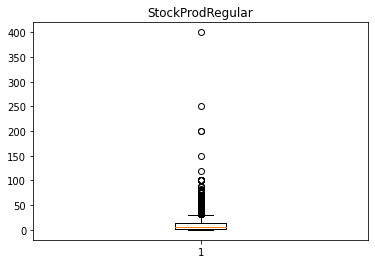

In [397]:
# Deteksi Outlier Data di Stock Regular Produk
plt.boxplot(MarketSurvey2019['StockProdRegular'])
plt.title('StockProdRegular')


In [398]:
MarketSurvey2019.describe()

,Category,StockProdRegular,ScoreLayananStock
count,2963.000000,2963.000000,2963.00000
mean,0.213972,10.438745,9.96220
std,0.575302,16.439150,40.68793
min,0.000000,0.000000,1.00000
25%,0.000000,1.000000,8.00000
50%,0.000000,6.000000,8.00000
75%,0.000000,13.000000,9.00000
max,2.000000,400.000000,999.00000


In [399]:
# Hitung Outlier dan menghapusnya

Q1=np.percentile(MarketSurvey2019['StockProdRegular'],25,interpolation='midpoint')
Q2=np.percentile(MarketSurvey2019['StockProdRegular'],50,interpolation='midpoint')
Q3=np.percentile(MarketSurvey2019['StockProdRegular'],75,interpolation='midpoint')

IQR=Q3-Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outlier=[]
for x in MarketSurvey2019['StockProdRegular']:
    if((x>upper_limit)or(x<lower_limit)):
        outlier.append(x)

In [400]:
lower_limit

-17.0

In [401]:
upper_limit

31.0

In [402]:
outlier

[51,
 48,
 70,
 40,
 50,
 45,
 50,
 35,
 60,
 38,
 41,
 45,
 35,
 41,
 46,
 50,
 49,
 43,
 35,
 35,
 35,
 56,
 76,
 35,
 50,
 100,
 33,
 40,
 33,
 52,
 35,
 50,
 38,
 45,
 50,
 50,
 35,
 120,
 70,
 68,
 70,
 45,
 45,
 75,
 83,
 35,
 250,
 40,
 33,
 67,
 40,
 34,
 35,
 54,
 80,
 52,
 35,
 35,
 50,
 45,
 58,
 63,
 70,
 35,
 60,
 45,
 80,
 200,
 70,
 100,
 80,
 100,
 50,
 100,
 78,
 50,
 80,
 35,
 100,
 50,
 54,
 43,
 42,
 33,
 48,
 50,
 34,
 46,
 42,
 42,
 55,
 66,
 33,
 35,
 100,
 60,
 50,
 40,
 40,
 80,
 50,
 44,
 41,
 200,
 60,
 74,
 48,
 60,
 100,
 50,
 400,
 32,
 86,
 64,
 32,
 60,
 68,
 64,
 48,
 33,
 35,
 35,
 35,
 35,
 60,
 50,
 57,
 70,
 150,
 35,
 50,
 32,
 35,
 35,
 50,
 81,
 50,
 53,
 50,
 35,
 32,
 63,
 60,
 70,
 60,
 40,
 55,
 34,
 34,
 89,
 42]

In [403]:
# Melihat Outlier dengan index
outlier_index=MarketSurvey2019['StockProdRegular']>upper_limit
MarketSurvey2019.loc[outlier_index].index

Int64Index([   4,    9,   84,  128,  135,  140,  146,  162,  177,  183,
            ...
            2451, 2488, 2492, 2536, 2719, 2799, 2843, 2863, 2865, 2884],
           dtype='int64', name='IDRetailer', length=151)

In [404]:
# Menghapus outlier sesuai index
# MarketSurvey2019 = MarketSurvey2019.drop(MarketSurvey2019.loc[outlier_index].index) -> Sama hasilnya dengan script dibawah ini
MarketSurvey2019.drop(MarketSurvey2019.loc[outlier_index].index,inplace=True)

Text(0.5, 1.0, 'StockProdRegular')

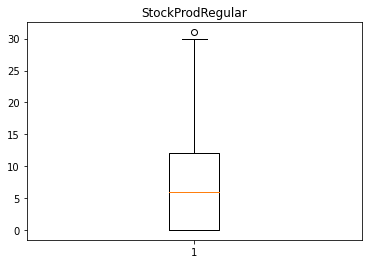

In [405]:
# Deteksi Outlier lagi setelah dihapus datanya di Stock Regular Produk
plt.boxplot(MarketSurvey2019['StockProdRegular'])
plt.title('StockProdRegular')

Text(0.5, 1.0, 'ScoreLayananStock')

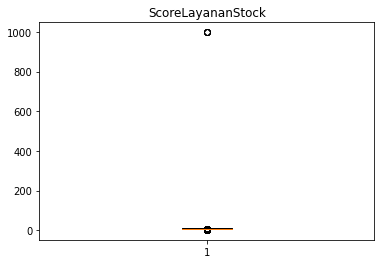

In [406]:
# Deteksi Outlier di ScoreLayananStock
plt.boxplot(MarketSurvey2019['ScoreLayananStock'])
plt.title('ScoreLayananStock')

In [407]:
# Hitung Outlier dan menghapusnya

Q1=np.percentile(MarketSurvey2019['ScoreLayananStock'],25,interpolation='midpoint')
Q2=np.percentile(MarketSurvey2019['ScoreLayananStock'],50,interpolation='midpoint')
Q3=np.percentile(MarketSurvey2019['ScoreLayananStock'],75,interpolation='midpoint')

IQR=Q3-Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outlier=[]
for x in MarketSurvey2019['ScoreLayananStock']:
    if((x>upper_limit)or(x<lower_limit)):
        outlier.append(x)


In [408]:
outlier_index=MarketSurvey2019['ScoreLayananStock']>upper_limit
MarketSurvey2019.loc[outlier_index].index
MarketSurvey2019.drop(MarketSurvey2019.loc[outlier_index].index,inplace=True)

Text(0.5, 1.0, 'ScoreLayananStock')

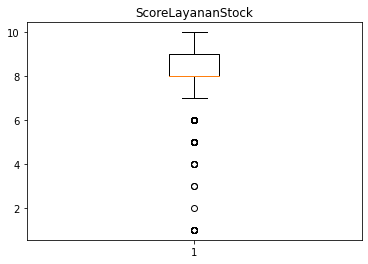

In [409]:
# Deteksi Outlier lagi setelah dihapus datanya di Stock Regular Produk
plt.boxplot(MarketSurvey2019['ScoreLayananStock'])
plt.title('ScoreLayananStock')

In [410]:
MarketSurvey2019.describe()

,Category,StockProdRegular,ScoreLayananStock
count,2807.000000,2807.000000,2807.000000
mean,0.221233,7.815105,8.287496
std,0.584187,7.735355,1.220371
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,8.000000
50%,0.000000,6.000000,8.000000
75%,0.000000,12.000000,9.000000
max,2.000000,31.000000,10.000000


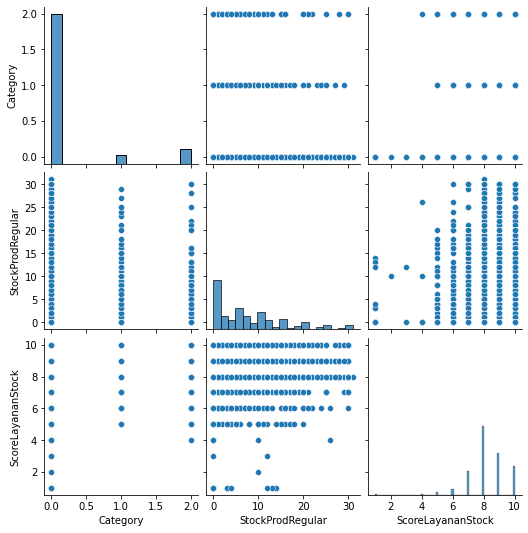

In [411]:
# Summary Grafik untuk EDA antar kolom
sns.pairplot(MarketSurvey2019)

<AxesSubplot:>

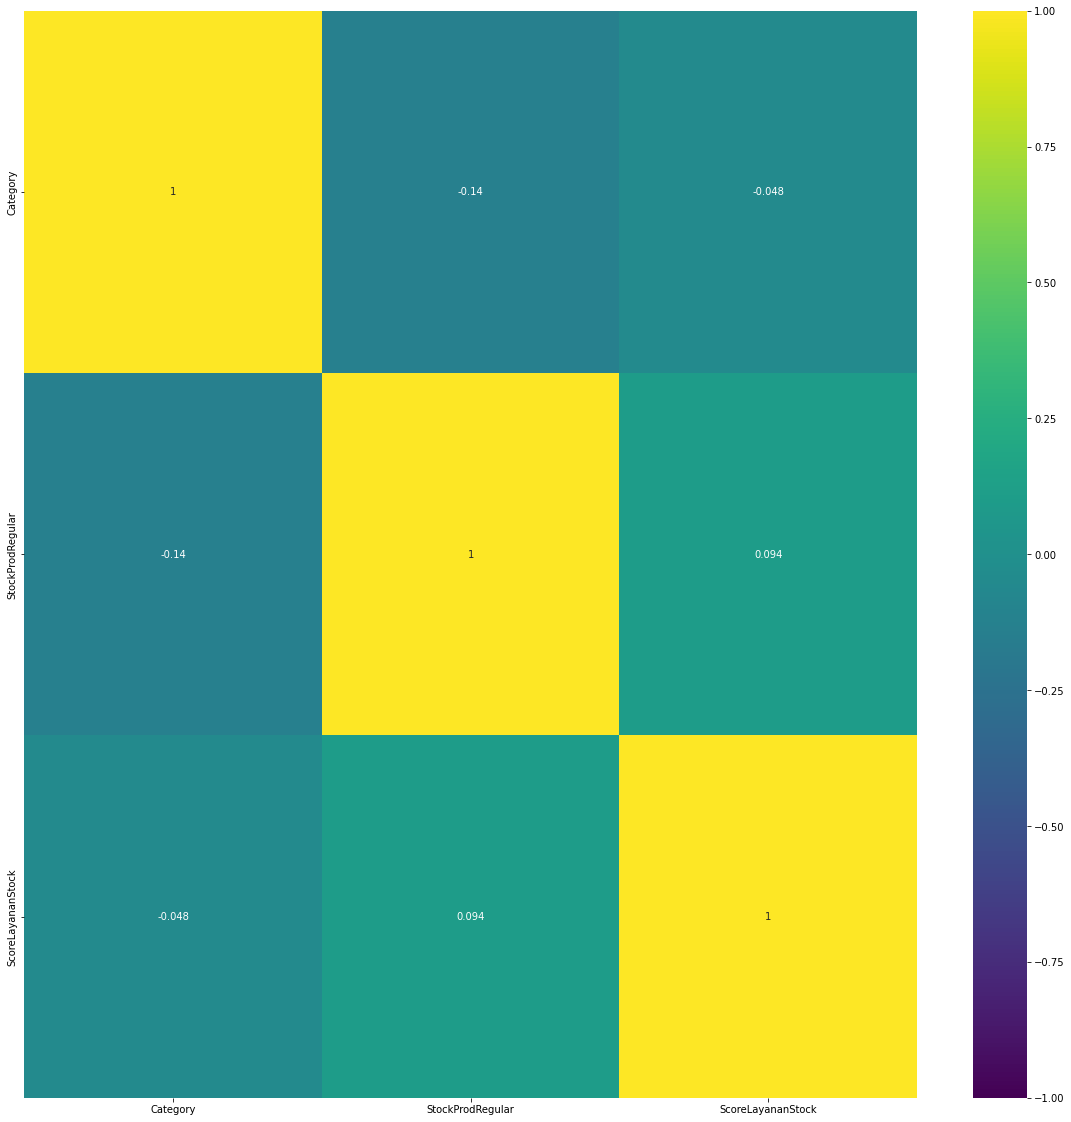

In [412]:
# Membuat Grafik Korelasi antar columns
fig_dimensi = (20,20)
fig, ax = plt.subplots(figsize=fig_dimensi)
sns.heatmap(MarketSurvey2019.corr(),vmin=-1,vmax=1,annot=True, cmap='viridis')

In [413]:
# Standarisasi Variable
scaler = StandardScaler()
scaled_survey = scaler.fit_transform(MarketSurvey2019[['Category','StockProdRegular','ScoreLayananStock']])
#MarketSurvey2019['ScorePKBase'] = scaler.fit_transform(MarketSurvey2019[['ScorePKBase']])
MarketSurvey2019.head()

,Category,StockProdRegular,ScoreLayananStock
IDRetailer,,,
1,2,8,7
2,2,5,8
3,2,6,7
5,2,5,8
6,2,3,8


Text(0, 0.5, 'ScoreLayananStock')

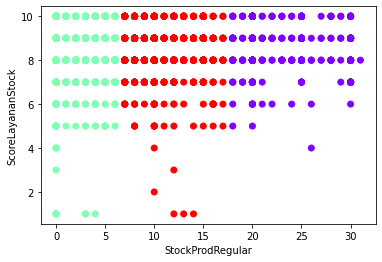

In [414]:
# Dari Grafik di atas terlihat bahwa Retailer akan me-stock Regular produk berhubungan dengan adanya matpro1 (0,81) dan
# Penjelasan atas produk knowlegde dari sales distributor (0,58)
# Clustering me-stock Regular produk berhubungan dengan adanya matpro1
# Di bawah ini kita akan buat asumsi cluster akan kita buat, misalnya secara random kita buat 3
x = MarketSurvey2019.copy()
kmeans = KMeans(3)

#fit dengan datasurvey
kmeans.fit(x)

#membuat copy input dari datasurvey
clusters = x.copy()
#beri note untuk cluster predict
clusters['cluster_pred'] = kmeans.fit_predict(x)

#buat plot grafik untuk cluster 2 kolom
plt.scatter(clusters['StockProdRegular'],clusters['ScoreLayananStock'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('StockProdRegular')
plt.ylabel('ScoreLayananStock')

Text(0, 0.5, 'within Clusters Sum of Squares(WCSS)')

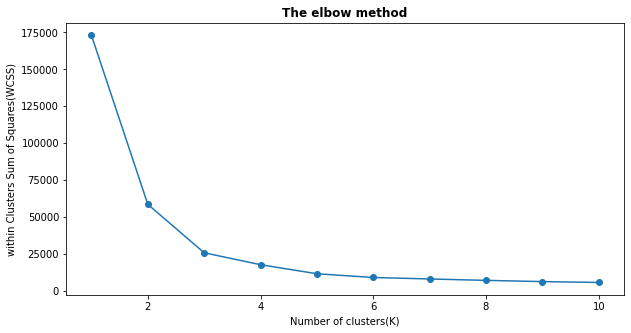

In [415]:
# Membuat grafik elbow untuk menentukan jumlah cluster yang optimal
wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
# Plotting hasil untuk observe 'The Elbow'
plt.figure(figsize=(10,5))
no_clusters=range(1,11)
plt.plot(no_clusters, wcss,marker = "o")
plt.title('The elbow method', fontweight="bold")
plt.xlabel('Number of clusters(K)')
plt.ylabel('within Clusters Sum of Squares(WCSS)')

In [416]:
# Mencari silhouette score to see if we have built a good model
print(silhouette_score(clusters, kmeans.labels_, metric='euclidean'))


0.4100538302707564


In [417]:
# Karena nilai silhouette score nya 0.5 atau mendekati 1 mengartikan model kita sudah OK dan 
# melihat elbow grafiknya di number cluster 5 melandai maka

#assign  clusters menjadi 5
kmeans_new = KMeans(5)
# Fit data survey
kmeans_new.fit(x)
# Create data frame baru dengan predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)


In [418]:
# Cek Data Survey dan clusteringnya
clusters_new.head()

,Category,StockProdRegular,ScoreLayananStock,cluster_pred
IDRetailer,,,,
1,2,8,7,2
2,2,5,8,1
3,2,6,7,1
5,2,5,8,1
6,2,3,8,1


Text(0, 0.5, 'Score Layanan Stock')

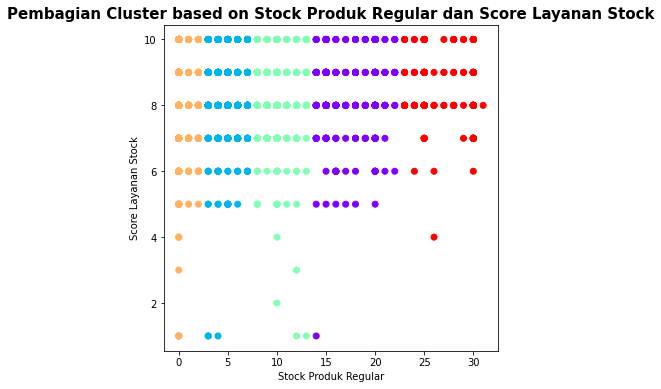

In [419]:
# Final Cluster dengan Analisanya
plt.figure(figsize=(6,6))
plt.scatter(clusters_new['StockProdRegular'],clusters_new['ScoreLayananStock'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.title("Pembagian Cluster based on Stock Produk Regular dan Score Layanan Stock", fontsize=15,fontweight="bold")
plt.xlabel("Stock Produk Regular")
plt.ylabel("Score Layanan Stock")

Dari hasil analisa cluster maka terdapat 5 cluster yang terdiri dari:
1. Stock Produk Regular dan Score nya rendah
2. Stock Produk Regular dan SCore nya tinggi
3. Stock Produk Regularnya dan Score A nya sedang 
4. Stock Produk Regularnya Rendah tapi  Score nya tinggi
5. Stock Produk Regularnya Tinggi tapi Score nya Rendah